Retail Project

In [ ]:
import pandas as pd
file_path = '/content/Online_Retail.csv'
data = pd.read_csv(file_path, encoding = 'windows-1252')


EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
data.duplicated().sum()

np.int64(5268)

In [ ]:
#Get unique values
unique_values ={col: data[col].unique() for col in data.columns}
for col, values in unique_values.items():
  print(f"Column where: {col}")
  print(f"Number of unique values: {len(values)}")
  print(f"Unique Values: {values[:10]}")
  print("-"*100)

Column where: InvoiceNo
Number of unique values: 25900
Unique Values: ['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
----------------------------------------------------------------------------------------------------
Column where: StockCode
Number of unique values: 4070
Unique Values: ['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
----------------------------------------------------------------------------------------------------
Column where: Description
Number of unique values: 4224
Unique Values: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
---------------------------------------------------------------------------------------

Data cleaning

In [ ]:
data_cleaned = data.drop_duplicates()
data_cleaned = data_cleaned.dropna(subset=['CustomerID'])

In [ ]:
data_cleaned.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
data_cleaned.duplicated().sum()

np.int64(0)

In [ ]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
#Create new column
data_cleaned['TotalAmount'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

In [ ]:
#Change the data type of InvoiceDate column (Time serie)
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalAmount  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


In [ ]:
data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


Find insights

In [ ]:
sales_by_year = data_cleaned.groupby('Year')['TotalAmount'].sum()
sales_by_year

,TotalAmount
Year,
2010,552372.860
2011,7726146.564


In [ ]:
data_cleaned['Semester'] = data_cleaned['Month'].apply(lambda x:1 if x<=6 else 2)
data_cleaned['Quarter'] = data_cleaned['Month'].apply(lambda x:1 if x<=3 else 2 if x<=6 else 3 if x<=9 else 4)

In [ ]:
sales_by_semester = data_cleaned.groupby(['Year','Semester'])['TotalAmount'].sum()
sales_by_semester

Year  Semester
2010  2            552372.860
2011  1           3166939.041
      2           4559207.523
Name: TotalAmount, dtype: float64

In [ ]:
sales_by_quarter = data_cleaned.groupby(['Year','Quarter'])['TotalAmount'].sum()
sales_by_quarter

Year  Quarter
2010  4           552372.860
2011  1          1487842.180
      2          1679096.861
      3          2117546.643
      4          2441660.880
Name: TotalAmount, dtype: float64

In [ ]:
sales_by_month = data_cleaned.groupby(['Year','Month'])['TotalAmount'].sum()
sales_by_month

Year  Month
2010  12        552372.860
2011  1         473731.900
      2         435534.070
      3         578576.210
      4         425222.671
      5         647011.670
      6         606862.520
      7         573112.321
      8         615078.090
      9         929356.232
      10        973306.380
      11       1126815.070
      12        341539.430
Name: TotalAmount, dtype: float64

We don't have info about 2010 first semester

Data visualization with matplotlib

In [ ]:
total_returns = data_cleaned[data_cleaned['Quantity'] < 0].shape[0]
total_returns

8872

In [ ]:
total_no_returns = data_cleaned[data_cleaned['Quantity'] > 0].shape[0]
total_no_returns

392732

In [ ]:
total_data = data_cleaned.shape[0]
total_data

401604

In [ ]:
total_no_returns + total_returns

401604

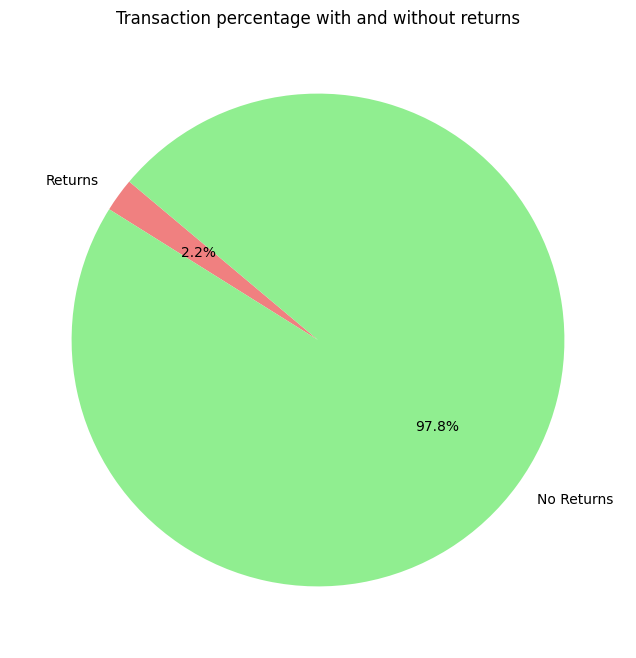

In [53]:
import matplotlib.pyplot as plt
labels =['Returns', 'No Returns']
sizes = [total_returns, total_no_returns]
colors =['lightcoral','lightgreen']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, startangle=140,autopct='%1.1f%%')
plt.title('Transaction percentage with and without returns')
plt.show()

In [54]:
#Create categorical column
def categorize_total_amount(amount):
  if amount <20:
    return 'Low'
  elif amount <100:
    return 'Medium'
  else:
    return 'High'

data_cleaned['AmountCategory'] = data_cleaned['TotalAmount'].apply(categorize_total_amount)
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Semester,Quarter,AmountCategory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2,4,Low
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,4,Medium
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2,4,Medium
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,4,Medium
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,4,Medium


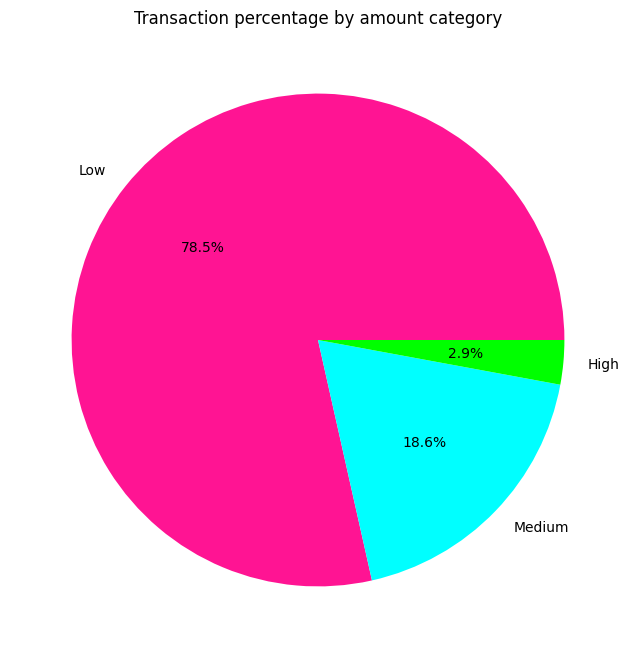

In [65]:
# Data preparation
total_low = data_cleaned[data_cleaned['AmountCategory'] == 'Low'].shape[0]
total_medium = data_cleaned[data_cleaned['AmountCategory'] == 'Medium'].shape[0]
total_high = data_cleaned[data_cleaned['AmountCategory'] == 'High'].shape[0]
#print(total_low, total_medium, total_high)
#print(total_data)
#print(total_low + total_medium + total_high)

#Visualization creation
labels = ['Low','Medium','High']
sizes = [total_low, total_medium, total_high]
colors = ['deeppink', 'cyan', 'lime']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels = labels, colors=colors, autopct='%1.1f%%')
plt.title('Transaction percentage by amount category')
plt.show()

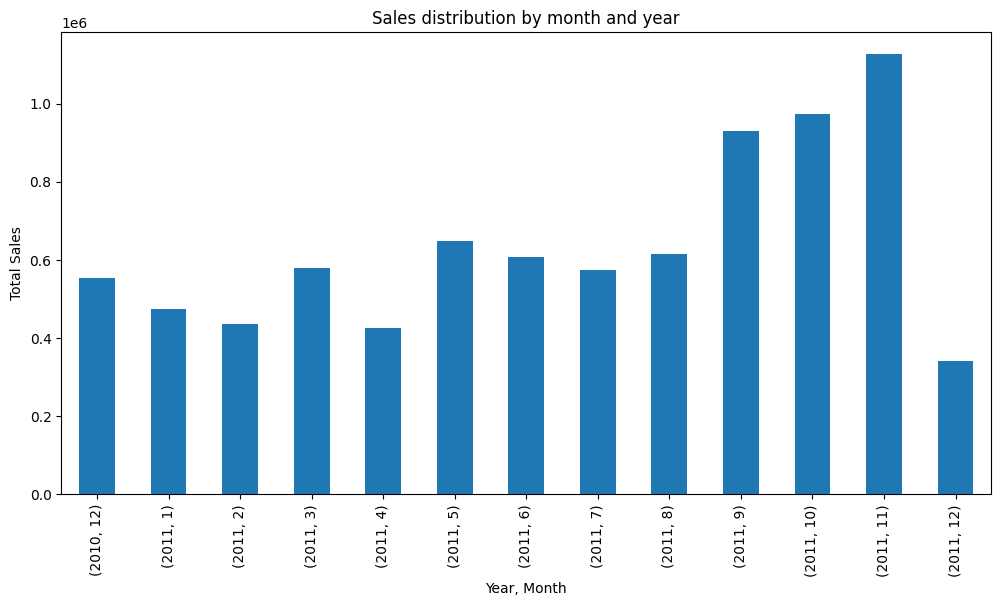

In [66]:
#Sales distribution by month and year
plt.figure(figsize=(12,6)) #inches
data_cleaned.groupby(['Year','Month'])['TotalAmount'].sum().plot(kind='bar')
plt.title('Sales distribution by month and year')
plt.xlabel('Year, Month')
plt.ylabel('Total Sales')
plt.show()

In [72]:
#Top 10 products
top_products = data_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index()
top_products = pd.merge(top_products, data_cleaned[['StockCode', 'Description']].drop_duplicates(),
                        on='StockCode', how='left')
top_products

,StockCode,Quantity,Description
0,84077,53119,WORLD WAR 2 GLIDERS ASSTD DESIGNS
1,22197,48689,SMALL POPCORN HOLDER
2,22197,48689,POPCORN HOLDER
3,85099B,44963,JUMBO BAG RED RETROSPOT
4,84879,35215,ASSORTED COLOUR BIRD ORNAMENT
5,85123A,34185,WHITE HANGING HEART T-LIGHT HOLDER
6,85123A,34185,CREAM HANGING HEART T-LIGHT HOLDER
7,21212,33386,PACK OF 72 RETROSPOT CAKE CASES
8,23084,27045,RABBIT NIGHT LIGHT
9,22492,25880,MINI PAINT SET VINTAGE


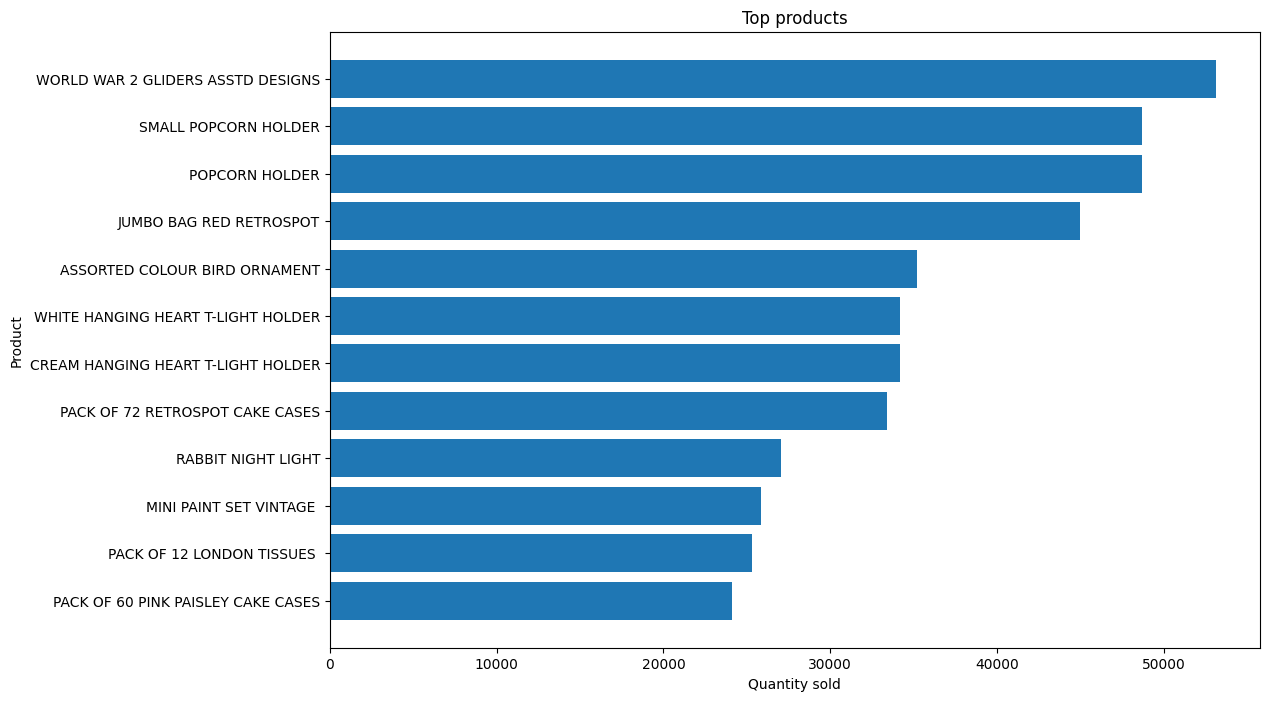

In [73]:
plt.figure(figsize=(12,8))
plt.barh(top_products['Description'], top_products['Quantity'])
plt.title('Top products')
plt.xlabel('Quantity sold')
plt.ylabel('Product')
plt.gca().invert_yaxis()
plt.show()
